# OLA3
### Gruppe H (Caroline og Maria)

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [2]:
shootings_df1 = pd.read_excel('Dataset/Mother_Jones_-_Mass_Shootings_Database_1982_-_2019.xlsx', 
                              na_values='-')
shootings_df2 = pd.read_excel('Dataset/Mass_Shootings_Dataset.xlsx')

In [3]:
shootings_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              149 non-null    object        
 1   location                          149 non-null    object        
 2   date                              149 non-null    datetime64[ns]
 3   summary                           149 non-null    object        
 4   fatalities                        149 non-null    int64         
 5   injured                           149 non-null    int64         
 6   total_victims                     149 non-null    int64         
 7   location.1                        149 non-null    object        
 8   age_of_shooter                    147 non-null    float64       
 9   prior_signs_mental_health_issues  119 non-null    object        
 10  mental_health_details             103 non-null    

In [4]:
shootings_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    398 non-null    int64  
 1   Title                 398 non-null    object 
 2   Location              398 non-null    object 
 3   Date                  398 non-null    object 
 4   Summary               397 non-null    object 
 5   Fatalities            398 non-null    int64  
 6   Injured               398 non-null    int64  
 7   Total victims         398 non-null    int64  
 8   Mental Health Issues  398 non-null    object 
 9   Race                  395 non-null    object 
 10  Gender                397 non-null    object 
 11  Latitude              378 non-null    float64
 12  Longitude             378 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 40.6+ KB


In [5]:
# rename to combine the two dfs into one
shootings_df2.columns = shootings_df2.columns.str.lower()

dfs = [shootings_df1, shootings_df2]
for df in dfs:
    df.rename(columns={'title': 'case', 'total victims': 'total_victims', 
                       'location.1': 'place', 
                       'mental health issues': 'prior_signs_mental_health_issues'}, 
              inplace=True)

In [6]:
shootings_df2['date'] = pd.to_datetime(shootings_df2['date'])

In [7]:
# Concat dfs
shootings_df = pd.concat([shootings_df1, shootings_df2], ignore_index=True)
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              547 non-null    object        
 1   location                          547 non-null    object        
 2   date                              547 non-null    datetime64[ns]
 3   summary                           546 non-null    object        
 4   fatalities                        547 non-null    int64         
 5   injured                           547 non-null    int64         
 6   total_victims                     547 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    147 non-null    float64       
 9   prior_signs_mental_health_issues  517 non-null    object        
 10  mental_health_details             103 non-null    

In [8]:
# Check for duplicates
columns_to_check = ['date', 'fatalities', 'injured', 'total_victims', 
                    'summary']

shootings_df = shootings_df.drop_duplicates(subset=columns_to_check)
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 546
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              466 non-null    object        
 1   location                          466 non-null    object        
 2   date                              466 non-null    datetime64[ns]
 3   summary                           465 non-null    object        
 4   fatalities                        466 non-null    int64         
 5   injured                           466 non-null    int64         
 6   total_victims                     466 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    147 non-null    float64       
 9   prior_signs_mental_health_issues  436 non-null    object        
 10  mental_health_details             103 non-null    objec

In [9]:
shootings_df.to_csv('Dataset/Combined_Mass_Shootings_1966-2023.csv', index=False)
shootings_df.to_excel('Dataset/Combined_Mass_Shootings_1966-2023.xlsx', index=False)

In [10]:
shootings_df['location'].value_counts()

location
Las Vegas, Nevada            6
Chicago, Illinois            6
Seattle, Washington          6
Los Angeles, California      5
Killeen, Texas               5
                            ..
Iuka, Mississippi            1
Hedingham, North Carolina    1
Vallejo, California          1
Muskegon, Michigan           1
Austin, Texas                1
Name: count, Length: 295, dtype: int64

### Missing data
Handle the missing data in age_of_shooter, because the age is often described in the summary.

In [11]:
# regex for finding age of shooter for e.g. FirstName LastName, 20,
pattern1 = r'\b, (\d{1,2}),'
# regex for finding age of shooter for e.g. 20-year-old and 20 year-old
pattern2 = r'\b(\d{1,3})[- ]?(?:year)[- ]?old\b'
# regex for finding multiple shooters age
pattern3 = r'\b(?:aged|ages?|age)\s+(\d{1,3})[,\s]'

shootings_df['age_of_shooter'] = shootings_df['age_of_shooter'].fillna(shootings_df['summary'].str.extract(pattern1)[0])
shootings_df['age_of_shooter'] = shootings_df['age_of_shooter'].fillna(shootings_df['summary'].str.extract(pattern2)[0])
shootings_df['age_of_shooter'] = shootings_df['age_of_shooter'].fillna(shootings_df['summary'].str.extract(pattern3)[0])

In [12]:
shootings_df['age_of_shooter'] = shootings_df['age_of_shooter'].astype(float)

In [13]:
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 546
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              466 non-null    object        
 1   location                          466 non-null    object        
 2   date                              466 non-null    datetime64[ns]
 3   summary                           465 non-null    object        
 4   fatalities                        466 non-null    int64         
 5   injured                           466 non-null    int64         
 6   total_victims                     466 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    319 non-null    float64       
 9   prior_signs_mental_health_issues  436 non-null    object        
 10  mental_health_details             103 non-null    objec

In [14]:
shootings_df['age_of_shooter'].value_counts()

age_of_shooter
44.0    14
19.0    14
18.0    13
15.0    12
28.0    12
20.0    12
40.0    11
22.0    10
17.0    10
39.0    10
26.0    10
42.0    10
43.0    10
21.0    10
45.0     9
41.0     9
36.0     9
34.0     8
14.0     8
24.0     8
23.0     7
25.0     7
29.0     7
16.0     6
37.0     6
47.0     6
35.0     6
59.0     6
32.0     5
27.0     5
38.0     4
31.0     4
51.0     3
64.0     3
57.0     3
33.0     3
52.0     3
48.0     3
55.0     3
12.0     2
50.0     2
13.0     2
67.0     2
66.0     2
70.0     2
30.0     2
11.0     1
54.0     1
10.0     1
46.0     1
3.0      1
72.0     1
Name: count, dtype: int64

### Some accidental outliers
Sidenote: Some of the ages are incorrect, where it took the ages from the summary, since the shotters age was unknown, but a victim's age appeared. Therefore, we have some outliers with fx age=3.

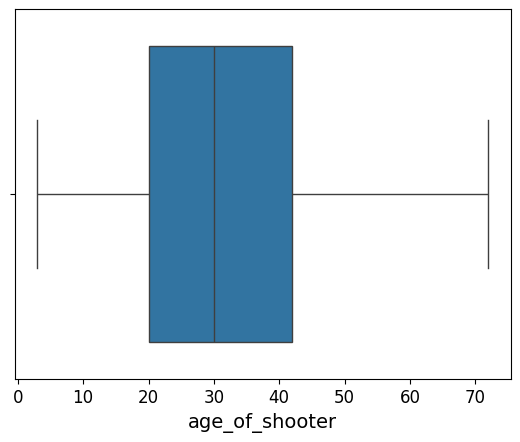

In [15]:
age_of_shooter_df = shootings_df[['age_of_shooter']] 

sns.boxplot(data=age_of_shooter_df, x='age_of_shooter')
plt.show()

In [16]:
age_under_15 = shootings_df[shootings_df['age_of_shooter'] < 15]
age_under_15 = age_under_15[['summary', 'age_of_shooter']]
pd.set_option('display.max_colwidth', None)
age_under_15

,summary,age_of_shooter
124,"Mitchell Scott Johnson, 13, and Andrew Douglas Golden, 11, two juveniles, ambushed students and teachers as they left the school; they were apprehended by police at the scene.",11.0
209,"Law enforcement officers in northeastern Mississippi stormed a house Saturday after an hours-long standoff with a gunman holed up inside, leading to a shootout that left one officer dead and three others wounded.The standoff started Friday afternoon when authorities responded to a domestic dispute call at the home near Iuka. But the man, holed up in his home with his wife and 10-year-old daughter, refused to come out, sparking the standoff with officers outside. The man suspected of firing on the officers was also killed.",10.0
237,"On Monday of November 23, 2015, three of four members of a family were shot and killed and a 12-year-old girl wounded at their home. The suspect died after being shot by police. The shooter was a once friendly neighbor of the victims.",12.0
242,"A gunman shot his girlfriend, his girlfriend's sister and her boyfriend to death in a Central Maine apartment building, leaving a young girl unharmed on the first floor before turning the weapon on himself. They all shared the brown clapboard home, which was divided into two apartments. The gunman and his girlfriend lived in the upstairs room of the apartment while the two other victims (his girlfriend's sister and her boyfriend) lived in the downstairs with their 3 year old daughter. All three victims were found on first floor.",3.0
288,"On February 27, 2015, the online Facebook brawl between two groups of friends spilled out into the streets with a planned videotaped fight. After the melee ensued, two teenage males pulled out guns and started shooting at the girls. The shots killed 14-year-old girl and wounded two others.",14.0
323,"On October 21, 2013, a 12-year old student at Sparks Middle School in Nevada, shot and injured two students and killed a teacher before killing himself.",12.0
400,"On October 11, 2007, a 14-year-old student of SuccessTech Academy in Cleveland, Ohio arrived at school two days after he had been suspended for getting into a fist-fight with another student. He then began shooting at students and teachers, injuring four during the incident and committing suicide.",14.0
438,"On December 6, 1999, a 13-year-old student at Fort Gibson Middle School in Fort Gibson, Oklahoma opened fire on his classmates for no apparent reason, wounding four before being stopped by a teacher and taken into custody.",13.0
451,"On April 24, 1998, a 14-year-old student of Park Middle School in Edinboro, Pennsylvania was attending the end-of-the-year dance at an off-campus banquet hall. The student pulled his father's gun from a pocket and began shooting, killing a teacher and wounding another and two students before being arrested.",14.0
453,"On March 24, 1998, a 13-year-old boy stole his mother's car that he and an 11-year-old cousin had loaded with guns and ammunition. When they arrived to Westside Middle School in Jonesboro, Arkansas, the younger boy pulled the fire alarm and met the elder on a hill overlooking the evacuation meeting site. They boys then began shooting at the crowd, killing four students and a teacher and wounding ten others before being arrested.",13.0


In [17]:
pd.reset_option('display.max_colwidth')

With row 209, 237, 242, and 288 are not the shooters' ages, but the victims. FX. We can see that in row 242, the shooter is not 3 years old.

We will manually change them back to missing.

In [18]:
rows_to_change = [209, 237, 242, 288]

shootings_df.loc[rows_to_change, 'age_of_shooter'] = np.nan

In [19]:
#check that they are missing. We'll just check the age 3 outlier
age_check = shootings_df[shootings_df['age_of_shooter'] == 3]
age_check

,case,location,date,summary,fatalities,injured,total_victims,place,age_of_shooter,prior_signs_mental_health_issues,...,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,s#


### Missing data
Since there are still some missing data in the age_of_shooter, we want to handle it. Since the dataset is small, we don't want to remove the rows with missing data, so instead we'll create n indicator variable, called age_missing, since the missing age is still valuable information

In [20]:
shootings_df['age_missing'] = shootings_df['age_of_shooter'].isnull().astype(int)

In [21]:
shootings_df

,case,location,date,summary,fatalities,injured,total_victims,place,age_of_shooter,prior_signs_mental_health_issues,...,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,s#,age_missing
0,UNLV shooting,"Las Vegas, Nevada",2023-12-06,"Anthony Polito, 67, a former university profes...",3,1,4,School,67.0,NaN,...,M,https://www.nbcnews.com/news/us-news/anthony-p...,NaN,NaN,NaN,NaN,mass,2023.0,NaN,0
1,Maine bowling alley and bar shootings,"Lewiston, Maine",2023-10-25,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40.0,yes,...,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,NaN,NaN,NaN,Spree,2023.0,NaN,0
2,Jacksonville Dollar General store shooting,"Jacksonville, Florida",2023-08-26,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21.0,yes,...,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,NaN,NaN,NaN,mass,2023.0,NaN,0
3,Orange County biker bar shooting,"Trabuco Canyon, California",2023-08-23,"John Snowling, 59, a retired sergeant from the...",3,6,9,Other,59.0,NaN,...,M,https://www.ocregister.com/2023/08/24/cooks-co...,NaN,NaN,NaN,NaN,mass,2023.0,NaN,0
4,Philidelphia neighborhood shooting,"Philadelphia, Pennsylvania",2023-07-03,"Kimbrady Carriker, 40, wearing a ski mask and ...",5,2,7,Other,40.0,yes,...,M,https://6abc.com/philly-mass-shooting-suspect-...,https://6abc.com/philly-mass-shooting-suspect-...,NaN,NaN,NaN,mass,2023.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Clara Barton Elementary School,"Chicago, Illinois",1974-01-17,"On January 17, 1974, a 14-year-old student ent...",1,3,4,NaN,14.0,Yes,...,Male,NaN,NaN,NaN,41.839280,-87.688181,NaN,NaN,394.0,0
543,New Orleans Police Shootings,"New Orleans, Louisiana",1972-12-31,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,NaN,23.0,Yes,...,Male,NaN,NaN,NaN,30.068724,-89.931474,NaN,NaN,395.0,0
544,St. Aloysius Church,"Spokane, Washington",1971-11-11,"On November 11, 1971, a former MIT student ent...",2,4,5,NaN,NaN,Yes,...,Male,NaN,NaN,NaN,47.673674,-117.415984,NaN,NaN,396.0,1
545,Rose-Mar College of Beauty,"Mesa, Arizona",1966-11-12,"On November 12, 1966, an 18-year-old high scho...",5,1,6,NaN,18.0,Yes,...,Male,NaN,NaN,NaN,33.422687,-111.816320,NaN,NaN,397.0,0


### Gender

In [22]:
shootings_df['gender'].value_counts()

gender
Male                                                                                                                                                                     351
M                                                                                                                                                                         77
Unknown                                                                                                                                                                   22
Female                                                                                                                                                                     7
Male/Female                                                                                                                                                                4
Male & Female                                                                                                                   

In [23]:
gender_mapping = {'M': 'Male', 'F': 'Female',
                  'F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)': 'Other',
                  'Male/Female': 'Other', 'Male & Female': 'Other'}

shootings_df['gender'] = shootings_df['gender'].replace(gender_mapping)

allowed_genders = ['Male', 'Female', 'Other', 'Unknown']
shootings_df.loc[~shootings_df['gender'].isin(allowed_genders), 'gender'] = 'Unknown'
shootings_df['gender'].value_counts()

gender
Male       428
Unknown     23
Female       8
Other        7
Name: count, dtype: int64

In [24]:
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 546
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              466 non-null    object        
 1   location                          466 non-null    object        
 2   date                              466 non-null    datetime64[ns]
 3   summary                           465 non-null    object        
 4   fatalities                        466 non-null    int64         
 5   injured                           466 non-null    int64         
 6   total_victims                     466 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    315 non-null    float64       
 9   prior_signs_mental_health_issues  436 non-null    object        
 10  mental_health_details             103 non-null    objec

### Mental health

In [25]:
shootings_df['prior_signs_mental_health_issues'].value_counts()

prior_signs_mental_health_issues
Yes         160
Unknown     120
No          110
Unclear      25
yes          14
TBD           5
Unclear       1
unknown       1
Name: count, dtype: int64

In [26]:
mh_mapping = {'yes': 'Yes', 'unknown': 'Unknown',
                  'Unclear ': 'Unclear',
                  'TBD': 'Unclear'}

shootings_df['prior_signs_mental_health_issues'] = shootings_df['prior_signs_mental_health_issues'].replace(mh_mapping)

allowed_mhs = ['Yes', 'No', 'Unclear', 'Unknown']
shootings_df.loc[~shootings_df['prior_signs_mental_health_issues'].isin(allowed_mhs), 'prior_signs_mental_health_issues'] = 'Unknown'
shootings_df['prior_signs_mental_health_issues'].value_counts()

prior_signs_mental_health_issues
Yes        174
Unknown    151
No         110
Unclear     31
Name: count, dtype: int64

## Race

In [27]:
shootings_df['race'].value_counts()

race
White American or European American                    137
Black American or African American                      78
white                                                   45
Unknown                                                 44
White                                                   40
Some other race                                         23
Black                                                   18
Asian American                                          16
Latino                                                  13
Asian                                                   10
black                                                    9
Other                                                    5
Native American                                          3
Two or more races                                        3
Native American or Alaska Native                         3
White                                                    1
unclear                                            

In [28]:
race_mapping = {'White American or European American': 'White', 'white': 'White', 'White ': 'White',
                'White American or European American/Some other Race': 'White',
                'Black American or African American': 'Black', 'black': 'Black',
                'Black American or African American/Unknown': 'Black',
                'Some other race': 'Other', 'Two or more races': 'Other', 'unclear': 'Other',
                'Asian American': 'Asian', 'Asian American/Some other race': 'Asian',
                'Native American or Alaska Native': 'Native American'}

shootings_df['race'] = shootings_df['race'].replace(race_mapping)

allowed_races = ["White", "Black", "Unknown", "Other", "Latino", "Asian", "Native American"]
shootings_df.loc[~shootings_df['race'].isin(allowed_races), 'race'] = 'Unknown'
shootings_df['race'].value_counts()

race
White              224
Black              106
Unknown             58
Other               32
Asian               27
Latino              13
Native American      6
Name: count, dtype: int64

## Latitude and Longitude

In [29]:
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 546
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              466 non-null    object        
 1   location                          466 non-null    object        
 2   date                              466 non-null    datetime64[ns]
 3   summary                           465 non-null    object        
 4   fatalities                        466 non-null    int64         
 5   injured                           466 non-null    int64         
 6   total_victims                     466 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    315 non-null    float64       
 9   prior_signs_mental_health_issues  466 non-null    object        
 10  mental_health_details             103 non-null    objec

In [30]:
df_missing_coordinates = shootings_df[shootings_df['latitude'].isnull() | shootings_df['longitude'].isnull()]
df_missing_coordinates['location'].value_counts()

location
Las Vegas, Nevada             2
Charlottesville, Virginia     1
Burlington, Washington        1
Fort Lauderdale, Florida      1
Kirkersville, Ohio            1
Buffalo, New York             1
Uvalde, Texas                 1
Tulsa, Oklahoma               1
Smithsburg, Maryland          1
Birmingham, Alabama           1
Highland Park, Illinois       1
Greenwood, Indiana            1
Hedingham, North Carolina     1
Colorado Springs, Colorado    1
Lewiston, Maine               1
Chesapeake, Virginia          1
Monterey Park, California     1
Half Moon Bay, California     1
East Lansing, Michigan        1
Nashville, Tennessee          1
Louisville, Kentucky          1
Allen, Texas                  1
Farmington, New Mexico        1
Philadelphia, Pennsylvania    1
Trabuco Canyon, California    1
Jacksonville, Florida         1
Baton Rouge, Louisiana        1
Name: count, dtype: int64

In [31]:
def fill_missing_lat_long(df):
    filled_locations = set()
    
    for index, row in df.iterrows():
        if pd.notna(row['latitude']) and pd.notna(row['longitude']):
            filled_locations.add((row['location'], row['latitude'], row['longitude']))
            
    for index, row in df.iterrows():
        if pd.isna(row['latitude']) or pd.isna(row['longitude']):
            for location, lat, long in filled_locations:
                if row['location'] == location:
                    df.at[index, 'latitude'] = lat
                    df.at[index, 'longitude'] = long
                    break
    
    return df

In [32]:
filled = fill_missing_lat_long(shootings_df)
filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 546
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              466 non-null    object        
 1   location                          466 non-null    object        
 2   date                              466 non-null    datetime64[ns]
 3   summary                           465 non-null    object        
 4   fatalities                        466 non-null    int64         
 5   injured                           466 non-null    int64         
 6   total_victims                     466 non-null    int64         
 7   place                             149 non-null    object        
 8   age_of_shooter                    315 non-null    float64       
 9   prior_signs_mental_health_issues  466 non-null    object        
 10  mental_health_details             103 non-null    objec

In [33]:
df_missing_coordinates = filled[filled['latitude'].isnull() | filled['longitude'].isnull()]
df_missing_coordinates['location'].value_counts()

location
Lewiston, Maine               1
Trabuco Canyon, California    1
Philadelphia, Pennsylvania    1
Farmington, New Mexico        1
Allen, Texas                  1
East Lansing, Michigan        1
Half Moon Bay, California     1
Monterey Park, California     1
Charlottesville, Virginia     1
Hedingham, North Carolina     1
Greenwood, Indiana            1
Highland Park, Illinois       1
Smithsburg, Maryland          1
Uvalde, Texas                 1
Buffalo, New York             1
Baton Rouge, Louisiana        1
Name: count, dtype: int64

In [34]:
# We asked chatGPT to make us a df with the last missing coordinates:
import pandas as pd

data = {
    "location": ["Lewiston, Maine", "Trabuco Canyon, California", "Philadelphia, Pennsylvania",
              "Farmington, New Mexico", "Allen, Texas", "East Lansing, Michigan",
              "Half Moon Bay, California", "Monterey Park, California", "Charlottesville, Virginia",
              "Hedingham, North Carolina", "Greenwood, Indiana", "Highland Park, Illinois",
              "Smithsburg, Maryland", "Uvalde, Texas", "Buffalo, New York", "Baton Rouge, Louisiana"],
    "latitude": [44.1004, 33.6784, 39.9526, 36.7281, 33.1032, 42.7364, 37.4636, 34.0625, 38.0293,
                 35.8482, 39.6137, 42.1817, 39.6554, 29.2097, 42.8864, 30.4515],
    "longitude": [-70.2148, -117.5899, -75.1652, -108.2187, -96.6706, -84.4832, -122.4286, -118.1228,
                  -78.4767, -78.5391, -86.1067, -87.8006, -77.5732, -99.7861, -78.8784, -91.1871]
}

coordinates_df = pd.DataFrame(data)
coordinates_df

,location,latitude,longitude
0,"Lewiston, Maine",44.1004,-70.2148
1,"Trabuco Canyon, California",33.6784,-117.5899
2,"Philadelphia, Pennsylvania",39.9526,-75.1652
3,"Farmington, New Mexico",36.7281,-108.2187
4,"Allen, Texas",33.1032,-96.6706
5,"East Lansing, Michigan",42.7364,-84.4832
6,"Half Moon Bay, California",37.4636,-122.4286
7,"Monterey Park, California",34.0625,-118.1228
8,"Charlottesville, Virginia",38.0293,-78.4767
9,"Hedingham, North Carolina",35.8482,-78.5391


In [35]:
shootings_df.set_index('location', inplace=True)
coordinates_df.set_index('location', inplace=True)

combined_df = shootings_df.combine_first(coordinates_df)
combined_df.reset_index(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   location                          466 non-null    object        
 1   age_missing                       466 non-null    int32         
 2   age_of_shooter                    315 non-null    float64       
 3   case                              466 non-null    object        
 4   date                              466 non-null    datetime64[ns]
 5   fatalities                        466 non-null    int64         
 6   gender                            466 non-null    object        
 7   injured                           466 non-null    int64         
 8   latitude                          466 non-null    float64       
 9   longitude                         466 non-null    float64       
 10  mental_health_details             103 non-null    

## Transform data
### Encoding genders

In [36]:
### This didn't work correctly TODO

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(shootings_df[['gender']]).toarray()
encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['gender']))
df_encoded = pd.concat([shootings_df, encoded_df], axis=1)
df_encoded.drop('gender', axis=1, inplace=True)

df_encoded

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
features = ['location', 'date', 'fatalities', 'injured', 
            'age_of_shooter', 'prior_signs_mental_health_issues',
            'race', 'gender', 'latitude', 'longitude']
target = 'total_victims'